## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9983105	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9792805	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9586599	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9422352	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9247679	total: 62.4ms	remaining: 12.4s
5:	learn: 0.9101553	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8959366	total: 64.5ms	remaining: 9.14s
7:	learn: 0.8791023	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8634316	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8462972	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8319620	total: 68ms	remaining: 6.11s
11:	learn: 0.8175288	total: 68.8ms	remaining: 5.67s
12:	learn: 0.8040434	total: 69.5ms	remaining: 5.28s
13:	learn: 0.7888552	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7758525	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7617915	total: 71.9ms	remaining: 4.42s
16:	learn: 0.7498984	total: 72.8ms	remaining: 4.21s
17:	learn: 0.7372786	total: 73.8ms	remaining: 4.03s
18:	learn: 0.7253597	total: 74.7ms	remaining: 

52:	learn: 0.4619216	total: 107ms	remaining: 1.92s
53:	learn: 0.4573951	total: 108ms	remaining: 1.9s
54:	learn: 0.4529361	total: 109ms	remaining: 1.88s
55:	learn: 0.4482843	total: 110ms	remaining: 1.86s
56:	learn: 0.4446660	total: 111ms	remaining: 1.84s
57:	learn: 0.4402623	total: 112ms	remaining: 1.82s
58:	learn: 0.4358464	total: 113ms	remaining: 1.8s
59:	learn: 0.4319039	total: 114ms	remaining: 1.79s
60:	learn: 0.4278934	total: 115ms	remaining: 1.77s
61:	learn: 0.4233415	total: 116ms	remaining: 1.76s
62:	learn: 0.4196437	total: 117ms	remaining: 1.74s
63:	learn: 0.4160883	total: 118ms	remaining: 1.73s
64:	learn: 0.4125496	total: 119ms	remaining: 1.71s
65:	learn: 0.4088222	total: 120ms	remaining: 1.7s
66:	learn: 0.4054873	total: 121ms	remaining: 1.69s
67:	learn: 0.4023351	total: 122ms	remaining: 1.67s
68:	learn: 0.3994709	total: 123ms	remaining: 1.66s
69:	learn: 0.3964153	total: 124ms	remaining: 1.64s
70:	learn: 0.3928765	total: 125ms	remaining: 1.63s
71:	learn: 0.3892967	total: 125ms	

149:	learn: 0.2648350	total: 191ms	remaining: 1.08s
150:	learn: 0.2638032	total: 192ms	remaining: 1.08s
151:	learn: 0.2629255	total: 193ms	remaining: 1.08s
152:	learn: 0.2622033	total: 194ms	remaining: 1.07s
153:	learn: 0.2615521	total: 195ms	remaining: 1.07s
154:	learn: 0.2609785	total: 196ms	remaining: 1.07s
155:	learn: 0.2597743	total: 196ms	remaining: 1.06s
156:	learn: 0.2589155	total: 197ms	remaining: 1.06s
157:	learn: 0.2581032	total: 198ms	remaining: 1.05s
158:	learn: 0.2568203	total: 199ms	remaining: 1.05s
159:	learn: 0.2560480	total: 200ms	remaining: 1.05s
160:	learn: 0.2553963	total: 200ms	remaining: 1.04s
161:	learn: 0.2545976	total: 201ms	remaining: 1.04s
162:	learn: 0.2541599	total: 202ms	remaining: 1.04s
163:	learn: 0.2536002	total: 203ms	remaining: 1.03s
164:	learn: 0.2530769	total: 204ms	remaining: 1.03s
165:	learn: 0.2524382	total: 205ms	remaining: 1.03s
166:	learn: 0.2518671	total: 205ms	remaining: 1.02s
167:	learn: 0.2509353	total: 206ms	remaining: 1.02s
168:	learn: 

275:	learn: 0.1903215	total: 298ms	remaining: 782ms
276:	learn: 0.1897266	total: 299ms	remaining: 781ms
277:	learn: 0.1890335	total: 300ms	remaining: 779ms
278:	learn: 0.1885031	total: 301ms	remaining: 778ms
279:	learn: 0.1880589	total: 302ms	remaining: 777ms
280:	learn: 0.1874535	total: 303ms	remaining: 775ms
281:	learn: 0.1872524	total: 304ms	remaining: 773ms
282:	learn: 0.1870193	total: 305ms	remaining: 772ms
283:	learn: 0.1864987	total: 305ms	remaining: 770ms
284:	learn: 0.1860076	total: 307ms	remaining: 770ms
285:	learn: 0.1857048	total: 308ms	remaining: 768ms
286:	learn: 0.1850662	total: 308ms	remaining: 766ms
287:	learn: 0.1844563	total: 309ms	remaining: 765ms
288:	learn: 0.1840375	total: 310ms	remaining: 763ms
289:	learn: 0.1837954	total: 311ms	remaining: 761ms
290:	learn: 0.1833782	total: 312ms	remaining: 760ms
291:	learn: 0.1831404	total: 313ms	remaining: 758ms
292:	learn: 0.1827283	total: 313ms	remaining: 756ms
293:	learn: 0.1823671	total: 314ms	remaining: 755ms
294:	learn: 

372:	learn: 0.1552819	total: 382ms	remaining: 642ms
373:	learn: 0.1550005	total: 383ms	remaining: 640ms
374:	learn: 0.1548253	total: 384ms	remaining: 639ms
375:	learn: 0.1546181	total: 384ms	remaining: 638ms
376:	learn: 0.1541863	total: 385ms	remaining: 636ms
377:	learn: 0.1537742	total: 386ms	remaining: 635ms
378:	learn: 0.1534496	total: 387ms	remaining: 634ms
379:	learn: 0.1532362	total: 388ms	remaining: 633ms
380:	learn: 0.1529003	total: 389ms	remaining: 631ms
381:	learn: 0.1526462	total: 389ms	remaining: 630ms
382:	learn: 0.1523713	total: 390ms	remaining: 629ms
383:	learn: 0.1521724	total: 391ms	remaining: 627ms
384:	learn: 0.1516866	total: 392ms	remaining: 626ms
385:	learn: 0.1512602	total: 393ms	remaining: 625ms
386:	learn: 0.1508356	total: 394ms	remaining: 623ms
387:	learn: 0.1505620	total: 394ms	remaining: 622ms
388:	learn: 0.1502287	total: 395ms	remaining: 621ms
389:	learn: 0.1497800	total: 396ms	remaining: 619ms
390:	learn: 0.1494825	total: 397ms	remaining: 618ms
391:	learn: 

499:	learn: 0.1212293	total: 489ms	remaining: 489ms
500:	learn: 0.1210618	total: 490ms	remaining: 488ms
501:	learn: 0.1208388	total: 491ms	remaining: 487ms
502:	learn: 0.1206303	total: 492ms	remaining: 486ms
503:	learn: 0.1204527	total: 492ms	remaining: 485ms
504:	learn: 0.1201579	total: 493ms	remaining: 484ms
505:	learn: 0.1198068	total: 494ms	remaining: 482ms
506:	learn: 0.1195044	total: 495ms	remaining: 481ms
507:	learn: 0.1193511	total: 496ms	remaining: 480ms
508:	learn: 0.1190487	total: 497ms	remaining: 479ms
509:	learn: 0.1187575	total: 497ms	remaining: 478ms
510:	learn: 0.1185066	total: 498ms	remaining: 477ms
511:	learn: 0.1181625	total: 499ms	remaining: 476ms
512:	learn: 0.1179152	total: 500ms	remaining: 475ms
513:	learn: 0.1176420	total: 501ms	remaining: 473ms
514:	learn: 0.1173855	total: 502ms	remaining: 472ms
515:	learn: 0.1171393	total: 503ms	remaining: 471ms
516:	learn: 0.1168673	total: 503ms	remaining: 470ms
517:	learn: 0.1167485	total: 504ms	remaining: 469ms
518:	learn: 

599:	learn: 0.0993752	total: 572ms	remaining: 382ms
600:	learn: 0.0991964	total: 573ms	remaining: 381ms
601:	learn: 0.0990701	total: 574ms	remaining: 380ms
602:	learn: 0.0988254	total: 575ms	remaining: 379ms
603:	learn: 0.0986383	total: 576ms	remaining: 377ms
604:	learn: 0.0984875	total: 576ms	remaining: 376ms
605:	learn: 0.0982757	total: 577ms	remaining: 375ms
606:	learn: 0.0980691	total: 578ms	remaining: 374ms
607:	learn: 0.0979011	total: 579ms	remaining: 373ms
608:	learn: 0.0977093	total: 580ms	remaining: 372ms
609:	learn: 0.0975340	total: 580ms	remaining: 371ms
610:	learn: 0.0973645	total: 581ms	remaining: 370ms
611:	learn: 0.0971336	total: 582ms	remaining: 369ms
612:	learn: 0.0970217	total: 583ms	remaining: 368ms
613:	learn: 0.0968418	total: 584ms	remaining: 367ms
614:	learn: 0.0966633	total: 585ms	remaining: 366ms
615:	learn: 0.0965049	total: 586ms	remaining: 365ms
616:	learn: 0.0963924	total: 586ms	remaining: 364ms
617:	learn: 0.0962237	total: 587ms	remaining: 363ms
618:	learn: 

729:	learn: 0.0800242	total: 679ms	remaining: 251ms
730:	learn: 0.0799197	total: 680ms	remaining: 250ms
731:	learn: 0.0797905	total: 681ms	remaining: 249ms
732:	learn: 0.0796714	total: 682ms	remaining: 248ms
733:	learn: 0.0795121	total: 682ms	remaining: 247ms
734:	learn: 0.0794179	total: 683ms	remaining: 246ms
735:	learn: 0.0793041	total: 684ms	remaining: 245ms
736:	learn: 0.0791632	total: 685ms	remaining: 244ms
737:	learn: 0.0790130	total: 686ms	remaining: 244ms
738:	learn: 0.0788526	total: 687ms	remaining: 243ms
739:	learn: 0.0787271	total: 688ms	remaining: 242ms
740:	learn: 0.0786133	total: 689ms	remaining: 241ms
741:	learn: 0.0784737	total: 689ms	remaining: 240ms
742:	learn: 0.0783721	total: 690ms	remaining: 239ms
743:	learn: 0.0782175	total: 691ms	remaining: 238ms
744:	learn: 0.0781228	total: 692ms	remaining: 237ms
745:	learn: 0.0779595	total: 693ms	remaining: 236ms
746:	learn: 0.0778386	total: 694ms	remaining: 235ms
747:	learn: 0.0777037	total: 694ms	remaining: 234ms
748:	learn: 

827:	learn: 0.0680267	total: 762ms	remaining: 158ms
828:	learn: 0.0679389	total: 763ms	remaining: 157ms
829:	learn: 0.0678643	total: 764ms	remaining: 156ms
830:	learn: 0.0677307	total: 765ms	remaining: 156ms
831:	learn: 0.0676866	total: 765ms	remaining: 155ms
832:	learn: 0.0676257	total: 766ms	remaining: 154ms
833:	learn: 0.0675208	total: 767ms	remaining: 153ms
834:	learn: 0.0674639	total: 768ms	remaining: 152ms
835:	learn: 0.0673436	total: 768ms	remaining: 151ms
836:	learn: 0.0672225	total: 769ms	remaining: 150ms
837:	learn: 0.0671319	total: 770ms	remaining: 149ms
838:	learn: 0.0670544	total: 771ms	remaining: 148ms
839:	learn: 0.0669192	total: 772ms	remaining: 147ms
840:	learn: 0.0668151	total: 773ms	remaining: 146ms
841:	learn: 0.0667119	total: 773ms	remaining: 145ms
842:	learn: 0.0666599	total: 774ms	remaining: 144ms
843:	learn: 0.0665768	total: 775ms	remaining: 143ms
844:	learn: 0.0664969	total: 776ms	remaining: 142ms
845:	learn: 0.0664615	total: 777ms	remaining: 141ms
846:	learn: 

958:	learn: 0.0570341	total: 869ms	remaining: 37.2ms
959:	learn: 0.0570272	total: 870ms	remaining: 36.3ms
960:	learn: 0.0569371	total: 871ms	remaining: 35.3ms
961:	learn: 0.0569220	total: 872ms	remaining: 34.4ms
962:	learn: 0.0567988	total: 873ms	remaining: 33.5ms
963:	learn: 0.0567266	total: 873ms	remaining: 32.6ms
964:	learn: 0.0567042	total: 874ms	remaining: 31.7ms
965:	learn: 0.0566053	total: 875ms	remaining: 30.8ms
966:	learn: 0.0565156	total: 876ms	remaining: 29.9ms
967:	learn: 0.0565073	total: 877ms	remaining: 29ms
968:	learn: 0.0564095	total: 877ms	remaining: 28.1ms
969:	learn: 0.0563432	total: 878ms	remaining: 27.2ms
970:	learn: 0.0562731	total: 879ms	remaining: 26.3ms
971:	learn: 0.0561693	total: 880ms	remaining: 25.3ms
972:	learn: 0.0560471	total: 881ms	remaining: 24.4ms
973:	learn: 0.0559671	total: 882ms	remaining: 23.5ms
974:	learn: 0.0558963	total: 883ms	remaining: 22.6ms
975:	learn: 0.0557944	total: 883ms	remaining: 21.7ms
976:	learn: 0.0557089	total: 884ms	remaining: 20

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

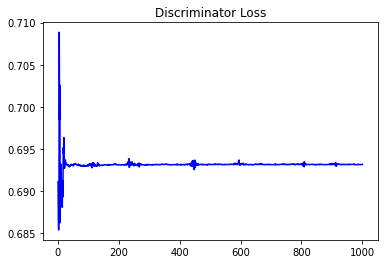

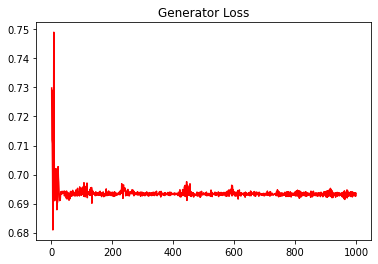

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07478659995707504


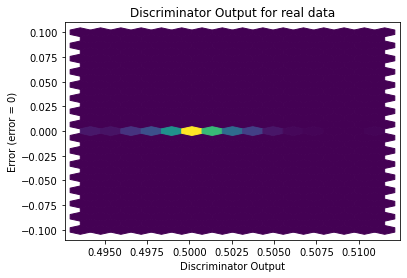

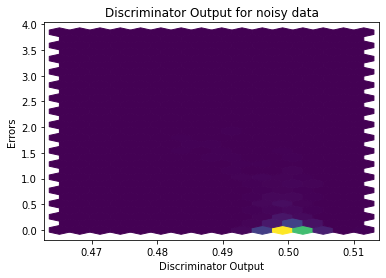

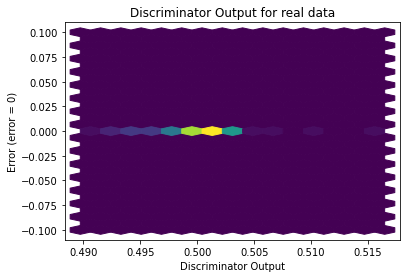

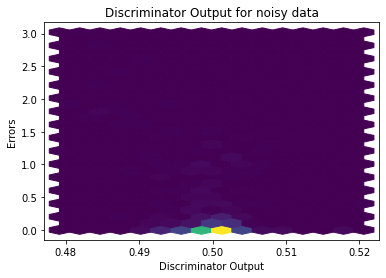

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


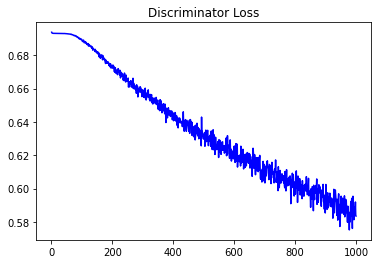

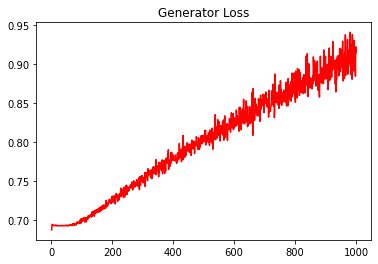

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07099660040739558


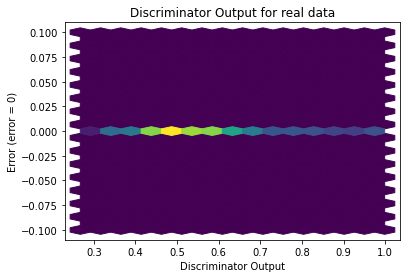

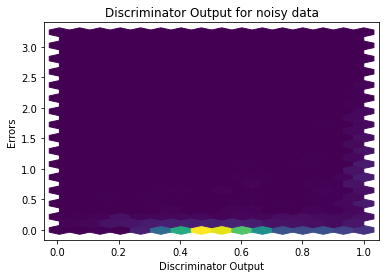

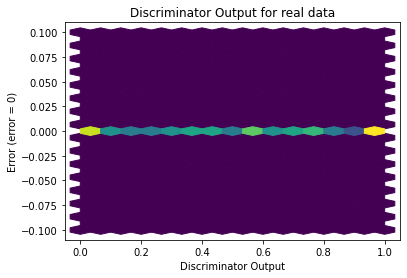

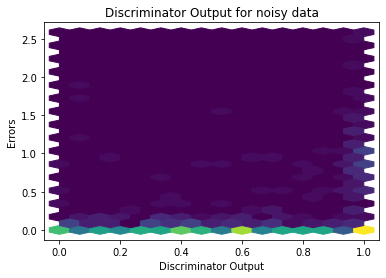

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
